<a href="https://colab.research.google.com/github/6760525/DST-MATH-6/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
filename = 'https://lms.skillfactory.ru/assets/courseware/v1/be9ea3bcfb9e5ebc744c1f2af98fed61/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Advertising.zip'
df = pd.read_csv(filename, index_col=0).reset_index(drop=True)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
mn = (None, 0)
for col in df.columns:
  n = df[col].isnull().sum()
  if n > 0: print(f'В колонке {col} отсутствует {n} значений')
  if (n > mn[1]): mn = (col, n)

if mn[0] != None:
  print(f"\nБольше всего пропусков ({mn[1]}) в колонке '{mn[0]}'")
else:
  print("\nПропусков нет")


Пропусков нет


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [6]:
n = df['sales'].shape[0]
X = np.array(df.drop('sales', axis=1).values.reshape(n, 3))
y = np.array(df['sales'].values)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [7]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [8]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))
#X = X / (np.linalg.norm(X, axis = 0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [9]:
def coordinate_descent(X, y, iter=100):
    m, n = X.shape
    w = np.zeros((n, 1))
    y = y.reshape(m, 1)
    
    for i in range(iter):
      for j in range(n):
        X_j = X[:, j].reshape(-1, 1)
        y_pred =  X @ w
        w[j] = X_j.T @ (y - y_pred + w[j] * X_j)

    return list(w.flatten())

In [10]:
w = coordinate_descent(X, y, 1000)
print([round(x, 5) for x in w])

[41.56217, 110.13144, 73.52861, -0.55006]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [11]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

### <font color='green'>Результаты практически совпали!</font>

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [12]:
Xn = X
X = np.array(df.drop('sales', axis=1).values.reshape(n, 3))

In [13]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [14]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [15]:
def mse_error(y_true, y_pred):
  return np.sum((y_true - y_pred) ** 2) / len (y_true)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [16]:
print(f'Среднеквадратичная ошибка для наивного прогноза: {mse_error(y, y.mean()):.2f}')

Среднеквадратичная ошибка для наивного прогноза: 27.09


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [17]:
def lin_pred(X, w):
  return (X.dot(w)).flatten()

In [18]:
w = [41.562172046036096, 110.13144155326064, 73.52860637603482, -0.5500638414307204]
print(f'Среднеквадратичная ошибка для прогноза, сделанного с помощью координатного спуска: {mse_error(y, lin_pred(Xn, w)):.2f}')

Среднеквадратичная ошибка для прогноза, сделанного с помощью координатного спуска: 2.78


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [19]:
def stoch_grad_step(X, y, w, train_ind, eta):
    g0 = (np.dot(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind, 0]
    g1 = (np.dot(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind, 1]
    g2 = (np.dot(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind, 2]
    g3 = (np.dot(X[train_ind], w) - y[train_ind]) * 2 * X[train_ind, 3]

    return w - eta / len(y) * np.array([g0, g1, g2, g3])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [20]:
def stochastic_gradient_descent(X, y, w_init, eta = .01, iter = 10000, eps = 1e-8):
  RANDOM_SEED = 42
  MAX_ITER = 50000
  e = np.inf
  w = w_init
  m = X.shape[0]
  mses = []
  i = 0
  b = 0
  np.random.seed(RANDOM_SEED)

  while (e > eps and i < MAX_ITER):
    step = stoch_grad_step(X, y, w, np.random.randint(m), eta)
    e = np.linalg.norm(w - step)
    mses.append(mse_error(y, lin_pred(X, w)))
    w = step
    i += 1

  return w, mses

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [21]:
w, mses = stochastic_gradient_descent(X, y, np.zeros((4, 1)), iter = 1e5)

**Постройте график зависимости ошибки от номера итерации**

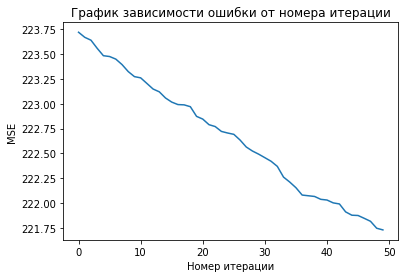

In [22]:
plt.plot(range(50), mses[:50])
plt.title('График зависимости ошибки от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('MSE');

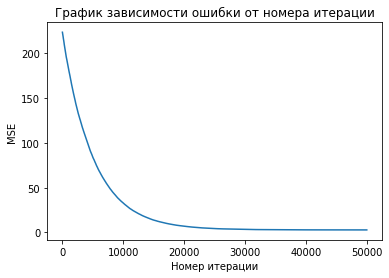

In [23]:
plt.plot(range(len(mses)), mses)
plt.title('График зависимости ошибки от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('MSE');

**Выведите вектор весов, к которому сошелся метод.**

In [24]:
print(f'Вектор весов, к которому сошелся метод: {[round(x, 5) for x in w.flatten()]}')

Вектор весов, к которому сошелся метод: [13.93498, 3.89313, 2.77, 0.02724]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [25]:
print(f'Среднеквадратичная ошибка на последней итерации: {mses[-1]:.5f}')

Среднеквадратичная ошибка на последней итерации: 2.79458


EOF